# Effects of Holidays on US Births

Average births over the course of a calendar year.

In [14]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
%matplotlib inline

plt.style.use('fivethirtyeight')

In [2]:
births = pd.read_csv('births.csv')

In [7]:
births.query?

Signature: births.query(expr: 'str', *, inplace: 'bool' = False, **kwargs) -> 'DataFrame | None'
Docstring:
Query the columns of a DataFrame with a boolean expression.

Parameters
----------
expr : str
    The query string to evaluate.

    You can refer to variables
    in the environment by prefixing them with an '@' character like
    ``@a + b``.

    You can refer to column names that are not valid Python variable names
    by surrounding them in backticks. Thus, column names containing spaces
    or punctuations (besides underscores) or starting with digits must be
    surrounded by backticks. (For example, a column named "Area (cm^2)" would
    be referenced as ```Area (cm^2)```). Column names which are Python keywords
    (like "list", "for", "import", etc) cannot be used.

    For example, if one of your columns is called ``a a`` and you want
    to sum it with ``b``, your query should be ```a a` + b``.

inplace : bool
    Whether to modify the DataFrame rather than creating a 

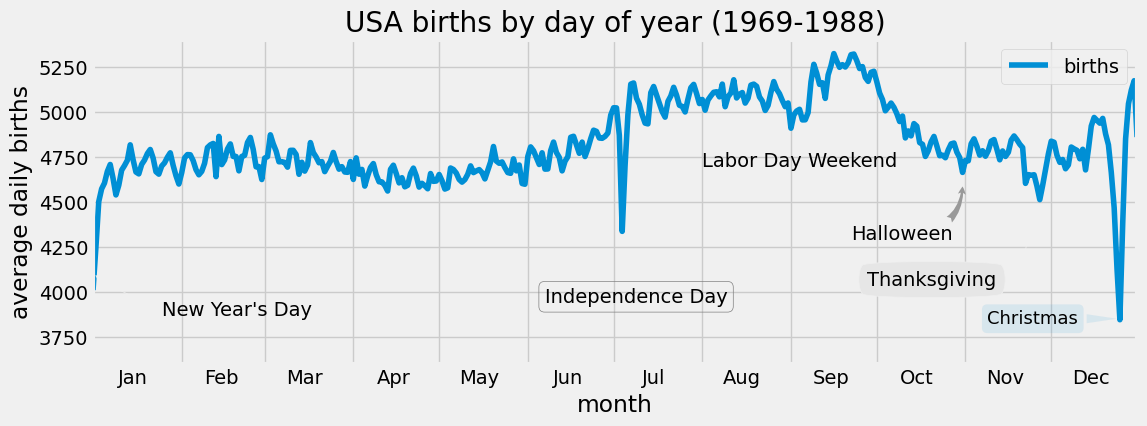

In [30]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births',
                                    [births.index.month, births.index.day])
births_by_date.index = [datetime(2012, month, day)
                        for (month, day) in births_by_date.index]

fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

style = dict(size=10, color='gray')

# ax.text('2012-1-1', 3950, "New Year's Day", **style)
# ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
# ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
# ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
# ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
# ax.text('2012-12-25', 3850, "Christmas ", ha='right', **style)

# Add labels to the plot
ax.annotate("New Year's Day", xy=('2012-1-1', 4100),  xycoords='data',
            xytext=(50, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.2"))

ax.annotate("Independence Day", xy=('2012-7-4', 4250),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(10, -40), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))

ax.annotate('Labor Day Weekend', xy=('2012-9-4', 4850), xycoords='data',
            ha='center', xytext=(0, -20), textcoords='offset points')
ax.annotate('', xy=('2012-9-1', 4850), xytext=('2012-9-7', 4850),
            xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '|-|,widthA=0.2,widthB=0.2', })

ax.annotate('Halloween', xy=('2012-10-31', 4600),  xycoords='data',
            xytext=(-80, -40), textcoords='offset points',
            arrowprops=dict(arrowstyle="fancy",
                            fc="0.6", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate('Thanksgiving', xy=('2012-11-25', 4500),  xycoords='data',
            xytext=(-120, -60), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=80,rad=20"))


ax.annotate('Christmas', xy=('2012-12-25', 3850),  xycoords='data',
             xytext=(-30, 0), textcoords='offset points',
             size=13, ha='right', va="center",
             bbox=dict(boxstyle="round", alpha=0.1),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1));

ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births', xlabel='month')
ax.set_ylim(3600, 5400);

# Format the x-axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

plt.show()